# IMDB

In [2]:
from keras.datasets import imdb

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
train_data.shape

(25000,)

In [5]:
train_labels.shape

(25000,)

In [6]:
test_data.shape

(25000,)

In [12]:
train_data[0][:10]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

In [13]:
train_labels[0]

1

In [16]:
max([max(sequence) for sequence in train_data])

9999

In [17]:
word_index = imdb.get_word_index()

1622016/1641221 [============================>.] - ETA: 0s

In [19]:
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])

In [30]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [40]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [42]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [43]:
x_train.shape

(25000, 10000)

In [44]:
x_test.shape

(25000, 10000)

In [45]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [46]:
y_train = np.array(train_labels).astype('float32')
y_test = np.array(test_labels).astype('float32')

In [47]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [52]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [53]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [54]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [55]:
x_val.shape

(10000, 10000)

In [56]:
partial_x_train.shape

(15000, 10000)

In [57]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [59]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [60]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s - loss: 0.5085 - acc: 0.7811 - val_loss: 0.3826 - val_acc: 0.8594
Epoch 2/20
15000/15000 [==============================] - 1s - loss: 0.2970 - acc: 0.9051 - val_loss: 0.3086 - val_acc: 0.8819
Epoch 3/20
15000/15000 [==============================] - 1s - loss: 0.2175 - acc: 0.9298 - val_loss: 0.3088 - val_acc: 0.8754
Epoch 4/20
15000/15000 [==============================] - 1s - loss: 0.1768 - acc: 0.9409 - val_loss: 0.2745 - val_acc: 0.8916
Epoch 5/20
15000/15000 [==============================] - 1s - loss: 0.1400 - acc: 0.9552 - val_loss: 0.2781 - val_acc: 0.8913
Epoch 6/20
15000/15000 [==============================] - 1s - loss: 0.1183 - acc: 0.9625 - val_loss: 0.2922 - val_acc: 0.8886
Epoch 7/20
15000/15000 [==============================] - 1s - loss: 0.0949 - acc: 0.9717 - val_loss: 0.3174 - val_acc: 0.8840
Epoch 8/20
15000/15000 [==============================] - 1s 

In [61]:
history_dict = history.history

In [62]:
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

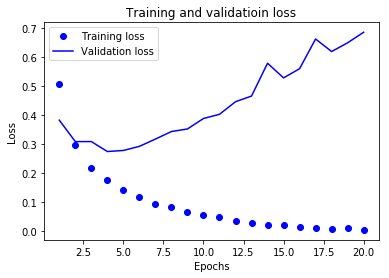

In [70]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validatioin loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

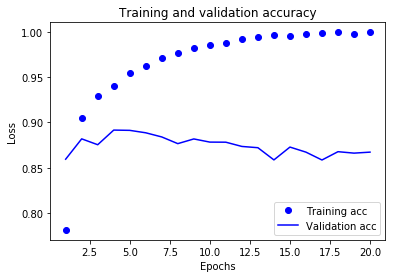

In [71]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [90]:
model = models.Sequential()
model.add(layers.Dense(2, activation='relu', input_shape=(10000, )))
#model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=14,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/14
15000/15000 [==============================] - 1s - loss: 0.6470 - acc: 0.7305 - val_loss: 0.5977 - val_acc: 0.8132
Epoch 2/14
15000/15000 [==============================] - 1s - loss: 0.5491 - acc: 0.8472 - val_loss: 0.5220 - val_acc: 0.8391
Epoch 3/14
15000/15000 [==============================] - 1s - loss: 0.4736 - acc: 0.8679 - val_loss: 0.4637 - val_acc: 0.8510
Epoch 4/14
15000/15000 [==============================] - 1s - loss: 0.4151 - acc: 0.8829 - val_loss: 0.4207 - val_acc: 0.8608
Epoch 5/14
15000/15000 [==============================] - 1s - loss: 0.3695 - acc: 0.8948 - val_loss: 0.3867 - val_acc: 0.8692
Epoch 6/14
15000/15000 [==============================] - 1s - loss: 0.3332 - acc: 0.9053 - val_loss: 0.3610 - val_acc: 0.8759
Epoch 7/14
15000/15000 [==============================] - 1s - loss: 0.3033 - acc: 0.9121 - val_loss: 0.3415 - val_acc: 0.8790
Epoch 8/14
15000/15000 [==============================] - 1s 

In [91]:
results = model.evaluate(x_test, y_test)

24512/25000 [============================>.] - ETA: 0s

In [92]:
results

[0.3014616904067993, 0.87956]

In [93]:
model.predict(x_test)

array([[0.89968413],
       [0.81025076],
       [0.99512607],
       ...,
       [0.7373095 ],
       [0.04962157],
       [0.8410288 ]], dtype=float32)

# Reuters

In [94]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2088960/2110848 [============================>.] - ETA: 0s

In [96]:
train_data.shape

(8982,)

In [97]:
train_labels.shape

(8982,)

In [98]:
test_data.shape

(2246,)

In [100]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [102]:
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [103]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [104]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [105]:
one_hot_train_labels.shape

(8982, 46)

In [106]:
one_hot_train_labels[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [107]:
test_labels[0]

3

In [108]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [109]:
from keras.models import Sequential
from keras.layers import Dense

In [110]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000, )))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))

In [112]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 64)                640064    
_________________________________________________________________
dense_26 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_27 (Dense)             (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [113]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [114]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [115]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s - loss: 2.5237 - acc: 0.4987 - val_loss: 1.7171 - val_acc: 0.6130
Epoch 2/20
7982/7982 [==============================] - 1s - loss: 1.4430 - acc: 0.6891 - val_loss: 1.3503 - val_acc: 0.7090
Epoch 3/20
7982/7982 [==============================] - 1s - loss: 1.0983 - acc: 0.7645 - val_loss: 1.1756 - val_acc: 0.7400
Epoch 4/20
7982/7982 [==============================] - 1s - loss: 0.8725 - acc: 0.8167 - val_loss: 1.0814 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s - loss: 0.7060 - acc: 0.8485 - val_loss: 0.9881 - val_acc: 0.7820
Epoch 6/20
7982/7982 [==============================] - 1s - loss: 0.5694 - acc: 0.8795 - val_loss: 0.9419 - val_acc: 0.8050
Epoch 7/20
7982/7982 [==============================] - 1s - loss: 0.4626 - acc: 0.9035 - val_loss: 0.9089 - val_acc: 0.8000
Epoch 8/20
7982/7982 [==============================] - 1s - loss: 0.3728 - a

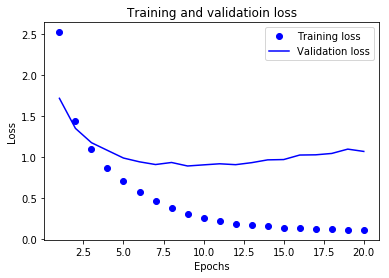

In [116]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validatioin loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

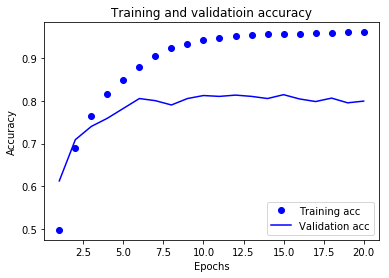

In [117]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validatioin accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [130]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000, )))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s - loss: 2.6589 - acc: 0.5462 - val_loss: 1.7449 - val_acc: 0.6300
Epoch 2/9
7982/7982 [==============================] - 1s - loss: 1.4328 - acc: 0.7080 - val_loss: 1.3063 - val_acc: 0.7050
Epoch 3/9
7982/7982 [==============================] - 1s - loss: 1.0635 - acc: 0.7772 - val_loss: 1.1559 - val_acc: 0.7560
Epoch 4/9
7982/7982 [==============================] - 1s - loss: 0.8415 - acc: 0.8232 - val_loss: 1.0512 - val_acc: 0.7850
Epoch 5/9
7982/7982 [==============================] - 1s - loss: 0.6788 - acc: 0.8532 - val_loss: 0.9828 - val_acc: 0.7940
Epoch 6/9
7982/7982 [==============================] - 1s - loss: 0.5453 - acc: 0.8841 - val_loss: 0.9494 - val_acc: 0.8070
Epoch 7/9
7982/7982 [==============================] - 1s - loss: 0.4440 - acc: 0.9073 - val_loss: 0.9408 - val_acc: 0.8060
Epoch 8/9
7

In [120]:
results = model.evaluate(x_test, one_hot_test_labels)

1920/2246 [========================>.....] - ETA: 0s

In [122]:
results

[0.9908220001553597, 0.784060552092609]

In [124]:
predictions = model.predict(x_test)

In [125]:
predictions.shape

(2246, 46)

In [126]:
np.sum(predictions[0])

0.99999994

In [127]:
np.argmax(predictions[0])

4

## Boston Housing Price

In [131]:
from keras.datasets import boston_housing

In [132]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s     


In [133]:
train_data.shape

(404, 13)

In [134]:
test_data.shape

(102, 13)

In [136]:
mean = train_data.mean(axis=0)

In [137]:
mean.shape

(13,)

In [138]:
std = train_data.std(axis=0)

In [139]:
std.shape

(13,)

In [140]:
train_data -= mean
train_data /= std

test_data -= mean
test_data /= std

In [141]:
train_data.shape[1]

13

In [142]:
from keras.models import Sequential
from keras.layers import Dense

In [148]:
def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1], )))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [149]:
model = build_model()

In [150]:
import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

In [151]:
num_val_samples

101

In [157]:
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]], axis=0)

    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [158]:
all_scores

[1.8556853733440437,
 2.5276408525976803,
 2.5729413079743337,
 2.4437286369871387]

In [159]:
np.mean(all_scores)

2.3499990427257993

In [162]:
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]], axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [164]:
np.array(all_mae_histories).shape

(4, 500)

In [170]:
average_mae_history = np.mean(all_mae_histories, axis=0)

In [171]:
average_mae_history.shape

(500,)

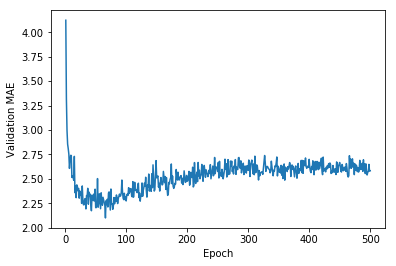

In [172]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.show()

In [175]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

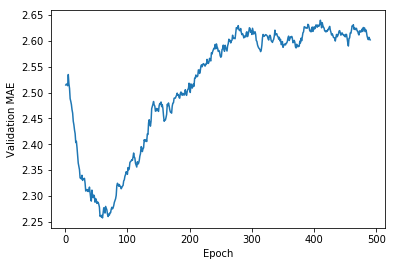

In [176]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.show()

In [177]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

 32/102 [========>.....................] - ETA: 0s

In [178]:
test_mae_score

2.6993242151596966